In [1]:
from qiskit import *
from sympy import *
import numpy as np
from qiskit.circuit.library.standard_gates import U3Gate
from qiskit.circuit.library.standard_gates import XGate

In [144]:
def rzryrz(U):
    '''
    Lab2 - questão 1
    :param U: matriz unitária 2 x 2
    :return: [alpha, beta, gamma e delta]
            U = e^(1j * alpha) * Rz(beta) * Ry(gamma) * Rz(delta)
    '''

    # -----------------
    # Seu código aqui

    # [ e^(i * x00) * cos(theta)    -e^(i * x01) * sin(theta) ]
    # [ e^(i * x01) * sin(theta)     e^(i * x11) * cos(theta) ]
    
    # Transformando a matriz em array
    Uarr = np.asarray(U).reshape(-1)
    
    # Pegando r, theta e gamma
    r = np.abs(Uarr[0])
    theta = np.arccos(r)
    gamma = 2 * theta
    
    # descobrindo x00
    x00 = np.angle(Uarr[0])
    x11 = np.angle(Uarr[3])
    
    divVal = np.sin(theta)
    if(divVal == 0):
        # tratando sin = 0
        # a - b/2 - d/2 = x00
        # a + b/2 + d/2 = x11
        
        # simplificando:
        # a - x = x00
        # a + x = x11
        
        coef = np.array([[1, -1], [1, 1]])
        ig   = np.array([x00, x11])
        [alpha, x] = np.linalg.solve(coef, ig)
        
        # logo, podemos assumir que (b/2 + d/2) = x, entao beta = delta = x eh uma solucao
        beta = x
        delta = x
    else:
        x01 = np.angle(-Uarr[1])
        x10 = np.angle(Uarr[2]) 
        coef = np.array([[1, -1/2, -1/2], [1, -1/2, 1/2], [1, 1/2, -1/2]])
        ig   = np.array([x00, x01, x10])
        res  = np.linalg.solve(coef, ig)
        [alpha, beta, delta] = [res[0], res[1], res[2]]
        

    # -----------------
    
    print("a, b, g, d: ", [alpha, beta, gamma, delta])
    
    return [alpha, beta, gamma, delta]

In [163]:
[alpha, beta, gamma, delta] = rzryrz([[1, 0], [0, np.e**(1j * np.pi/4)]])

a, b, g, d:  [0.39269908169872414, 0.39269908169872414, 0.0, 0.39269908169872414]


In [164]:
def Rz(theta):
    return np.array([[np.e**(-1j*theta/2), 0],[0, np.e**(1j*theta/2)]])

def Ry(theta):
    return np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])

In [165]:
print(np.e**(alpha*1j) * (Rz(beta) @ Ry(gamma) @ Rz(delta)))

[[1.        +5.55111512e-17j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.70710678+7.07106781e-01j]]


In [35]:
######### questao 2

In [40]:
def operador_controlado(V):
    
    ## matriz A = Rz(betta)Ry(gamma/2)
    def mat_a(beta, gamma):
        circuit = QuantumCircuit(1)

        circuit.rz(beta, 0)
        circuit.ry(gamma/2, 0)

        A_gate = circuit.to_gate()
        A_gate.name = "A"

        return A_gate

    ## matriz B = Ry(-gamma/2)Rz(-(delta + beta)/2)
    def mat_b(beta, delta, gamma):
        circuit = QuantumCircuit(1)

        circuit.ry(-gamma/2, 0)
        circuit.rz(-(delta + beta)/2, 0)

        B_gate = circuit.to_gate()
        B_gate.name = "B"

        return B_gate

    ## matriz C = Rz((delta - beta)/2)
    def mat_c(beta, delta):
        circuit = QuantumCircuit(1)

        circuit.rz((delta - beta)/2, 0)

        C_gate = circuit.to_gate()
        C_gate.name = "C"

        return C_gate

    ## Pegando parametros para V
    [alpha, beta, gamma, delta] = rzryrz(V)
    
    ## Circuito
    circuit = QuantumCircuit(2)
    
    # Matriz C
    circuit.append(mat_c(beta, delta), [1])
    circuit.cx(0, 1)
    
    # Matriz B
    circuit.append(mat_b(beta, delta, gamma), [1])
    circuit.cx(0, 1)
    
    # Matriz A
    circuit.append(mat_a(beta, gamma), [1])
    circuit.append(U3Gate(0, 0, alpha).control(1, None, 1), [0, 1])
    
    return circuit


a, b, g, d:  [0.0, 0.0, 0.0, 0.0]


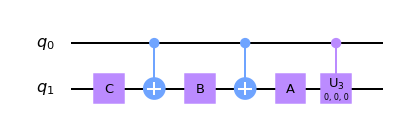

In [41]:
circuit = operador_controlado([[1, 0], [0, 1]])
circuit.draw('mpl')